In [1]:
#Import relevant models
import numpy as np
import pandas as pd
import seaborn as sns 
import tensorflow as tf
import matplotlib.pyplot as plt

#Importing from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Importing from tensorflow
from tensorflow import keras
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping

2023-01-15 04:32:33.892594: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('../Boston House Pricing/boston.csv')
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per 10,000usd

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT % lower status of the population

In [3]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.info()
#However, CHAS and RAD will be elimnated later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


As we can see, 

In [6]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot: >

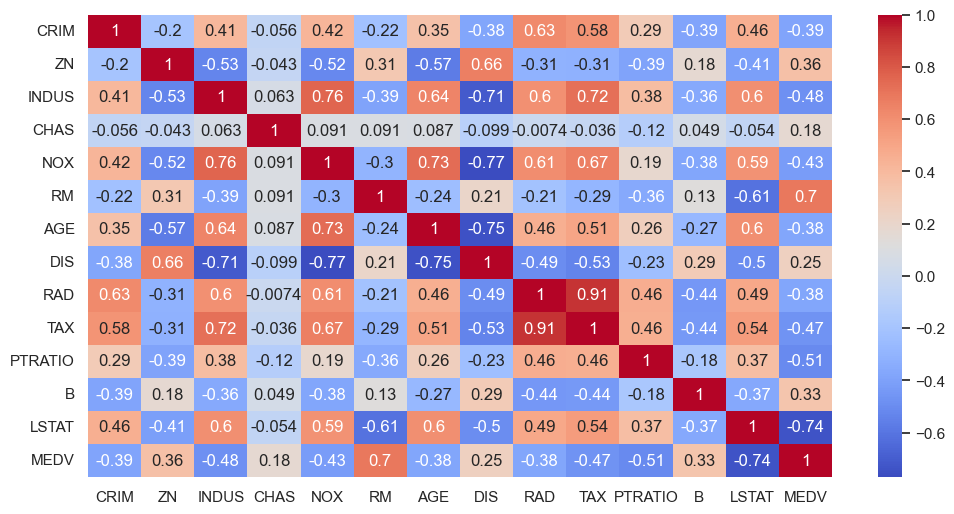

In [7]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [8]:
df3 = df.drop(['B', 'CRIM', 'ZN', 'CHAS', 'DIS','AGE','RAD','INDUS', 'NOX', 'TAX'], axis=1)
df3.corr()

,RM,PTRATIO,LSTAT,MEDV
RM,1.000000,-0.355501,-0.613808,0.695360
PTRATIO,-0.355501,1.000000,0.374044,-0.507787
LSTAT,-0.613808,0.374044,1.000000,-0.737663
MEDV,0.695360,-0.507787,-0.737663,1.000000


In [9]:
for k, v in df3.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df3)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column RM outliers = 5.93%
Column PTRATIO outliers = 2.96%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [10]:
df3 = df3[~(df3['MEDV'] >= 50.0)]
print(np.shape(df3))

(490, 4)


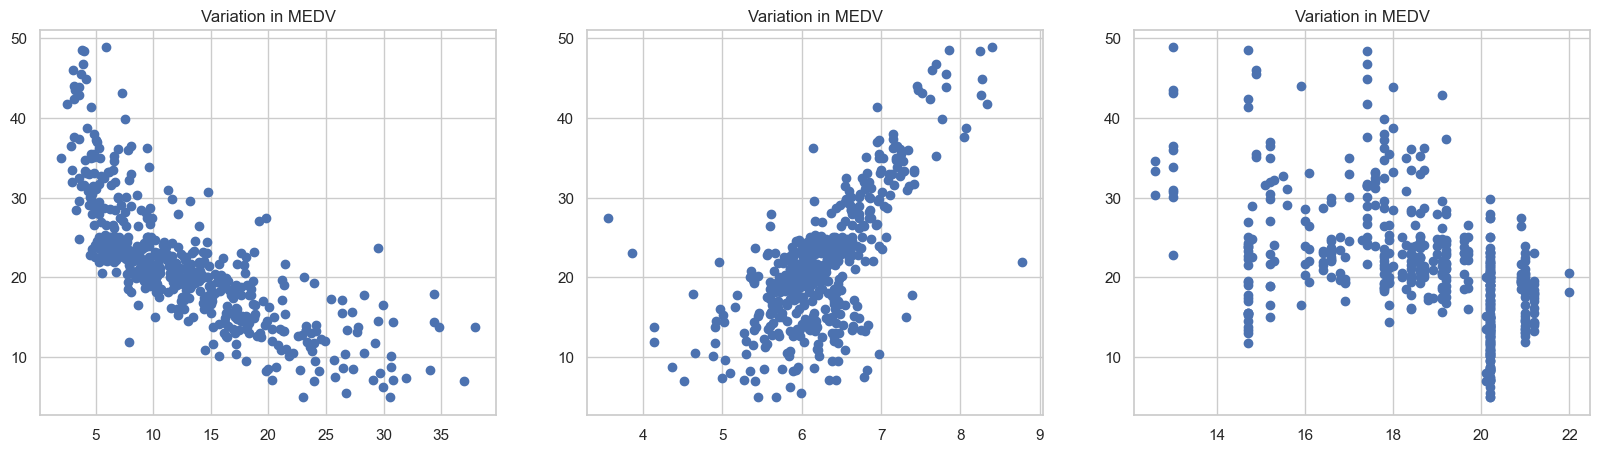

In [11]:
plt.figure(figsize = (20,5))
features = ['LSTAT','RM','PTRATIO']
for i, col in enumerate(features):
    plt.subplot(1,len(features), i+1)
    x = df3[col]
    y= df3.MEDV
    plt.scatter(x,y,marker ='o')
    plt.title ("Variation in MEDV")

/var/folders/y7/b9q8qz9942vb03jb76_vv3s80000gn/T/ipykernel_17371/1250640467.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3.MEDV)


<AxesSubplot: xlabel='MEDV', ylabel='Density'>

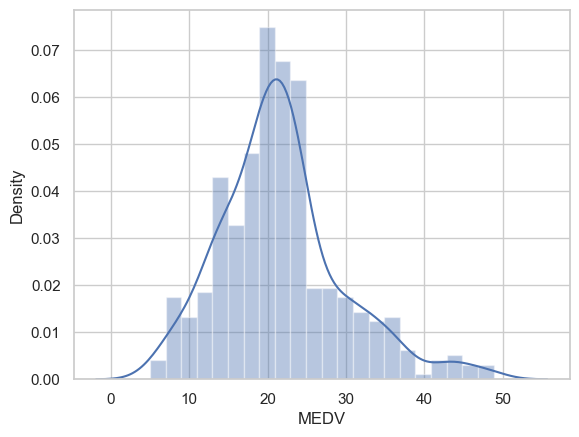

In [12]:
sns.distplot(df3.MEDV)

In [13]:
x = df3.iloc[:,:-1]
y = df3.MEDV

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =4)

In [15]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.01)

In [16]:
model = Sequential()

model.add(Dense(128,activation  = 'relu',kernel_regularizer=regularizers.l2(0.01),input_dim =3))
model.add(BatchNormalization())
model.add(Dense(64,activation  = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dense(32,activation  = 'relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dense(16,activation = 'relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dense(1))
          
model.compile(optimizer = 'Adamax',loss = 'mean_squared_error', metrics = ['mean_squared_error'])

2023-01-15 04:32:37.971605: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
history = model.fit(x_train, y_train, validation_data=(x_train, y_train), epochs = 500, batch_size = 32, verbose=1, callbacks=[early_stopping])

Epoch 1/500
13/13 [==============================] - 1s 12ms/step - loss: 520.0644 - mean_squared_error: 518.5159 - val_loss: 533.7401 - val_mean_squared_error: 532.1913
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 504.6088 - mean_squared_error: 503.0600 - val_loss: 526.3916 - val_mean_squared_error: 524.8427
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 496.5316 - mean_squared_error: 494.9827 - val_loss: 518.5263 - val_mean_squared_error: 516.9774
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 491.2693 - mean_squared_error: 489.7206 - val_loss: 510.6716 - val_mean_squared_error: 509.1230
Epoch 5/500
13/13 [==============================] - 0s 4ms/step - loss: 485.9552 - mean_squared_error: 484.4066 - val_loss: 503.3841 - val_mean_squared_error: 501.8358
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 481.2886 - mean_squared_error: 479.7405 - val_loss: 495.6902 - val_mean_squared_e

Epoch 98/500
13/13 [==============================] - 0s 3ms/step - loss: 26.2695 - mean_squared_error: 24.7397 - val_loss: 20.3031 - val_mean_squared_error: 18.7734
Epoch 99/500
13/13 [==============================] - 0s 3ms/step - loss: 24.3939 - mean_squared_error: 22.8642 - val_loss: 19.5605 - val_mean_squared_error: 18.0309
Epoch 100/500
13/13 [==============================] - 0s 3ms/step - loss: 20.8082 - mean_squared_error: 19.2787 - val_loss: 18.3442 - val_mean_squared_error: 16.8147
Epoch 101/500
13/13 [==============================] - 0s 3ms/step - loss: 21.1676 - mean_squared_error: 19.6382 - val_loss: 17.7663 - val_mean_squared_error: 16.2369
Epoch 102/500
13/13 [==============================] - 0s 3ms/step - loss: 24.9051 - mean_squared_error: 23.3758 - val_loss: 16.9001 - val_mean_squared_error: 15.3708
Epoch 103/500
13/13 [==============================] - 0s 3ms/step - loss: 19.3358 - mean_squared_error: 17.8064 - val_loss: 15.9036 - val_mean_squared_error: 14.3743


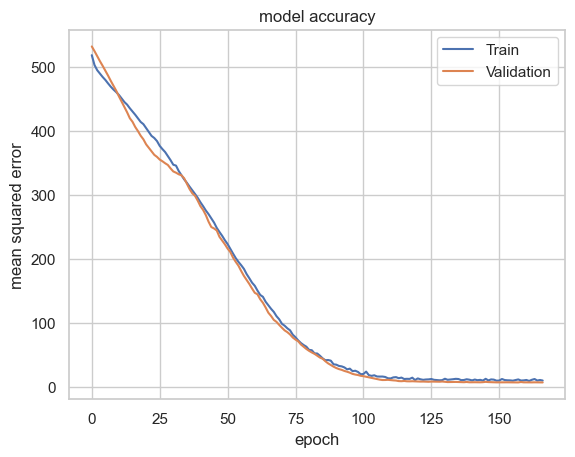

In [18]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

4/4 [==============================] - 0s 850us/step


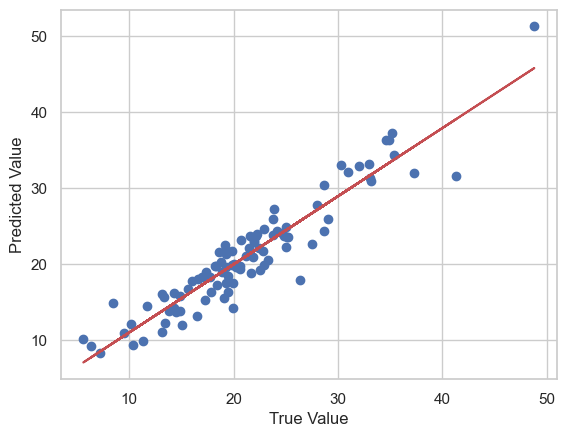

In [19]:
y_pred = model.predict(x_test).flatten()

# Create approximation straight line
p = np.polyfit(y_test, y_pred, 1)
f = np.poly1d(p)

plt.scatter(y_test, y_pred)
plt.plot(y_test, f(y_test), color = "r", label="Ism")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.show()

In [20]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 868us/step


In [21]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

2.5481429375361895


In [22]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.8851715335111718
